In [0]:
!git clone https://github.com/abhishek-choudharys/PokemonGAN

Cloning into 'PokemonGAN'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 133 (delta 12), reused 106 (delta 1), pack-reused 0
Receiving objects: 100% (133/133), 52.27 MiB | 10.88 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [0]:
cd

/root


In [0]:
rm -r PokemonGAN/

In [0]:
cd ../content/PokemonGAN

[Errno 2] No such file or directory: '../content/PokemonGAN'
/content/PokemonGAN


In [0]:
run resize.py

In [0]:
run convertRGBAtoRGB.py

In [0]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
#import plot_utils
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython import display

In [0]:
print('Tensorflow version: ', tf.__version__)

Tensorflow version:  2.2.0-rc4


In [0]:
def show(images, n_cols = None):
    print(type(images), images.shape)
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1

    if(images.shape[-1] == 1):
        images = np.squeeze(images, axis=-1)
    
    plt.figure(figsize = (n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_cols, n_rows, index+1)
        plt.imshow(image, cmap = "binary")
        plt.axis("off")

In [0]:
os.getcwd()

'/content/PokemonGAN'

In [0]:
directory = '.'
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        directory,
        shuffle = True,
        target_size=(256, 256),
        batch_size=32,
        classes = ['resized_RGB'])

test_generator = test_datagen.flow_from_directory(
        directory,
        target_size=(256, 256),
        batch_size=32,
        classes = ['resized_RGB'])

Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [0]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img_rgb = img[:, :, [2, 1, 0]]
        if img_rgb is not None:
            images.append(img_rgb)
    return images

images = load_images_from_folder('resized_RGB')
type(images)

list

list

In [0]:
import random
def grab_batch(images, batch_size):
    image_batch = np.zeros([32, 256, 256, 3])
    #image_batchx = np.empty()
    #print(np.asarray(random.sample(images, 1)).shape)
    for i in range(0, batch_size):
        image_batch[i,:,:,:] = np.asarray(random.sample(images, 1))[:,:,:]
        #image_batchx = np.append(image_batchx, np.asarray(random.sample(images, 1))[:,:,:])
    
    return image_batch
    
image_batch = np.asarray(grab_batch(images, 32))
image_batch = image_batch/255

print(type(image_batch))
print(image_batch.shape)

<class 'numpy.ndarray'>
(32, 256, 256, 3)


In [0]:
show(image_batch)
print(image_batch[0,:,:,:].shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<class 'numpy.ndarray'> (32, 256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(256, 256, 3)


<class 'numpy.ndarray'>


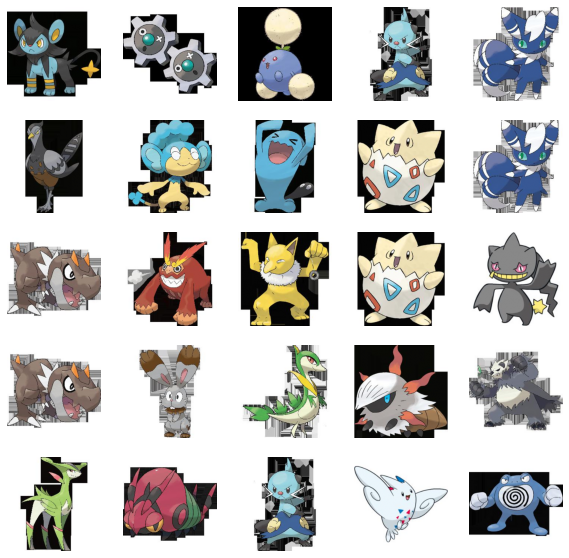

In [0]:
show_batch(image_batch) #from custom grab

<class 'list'>


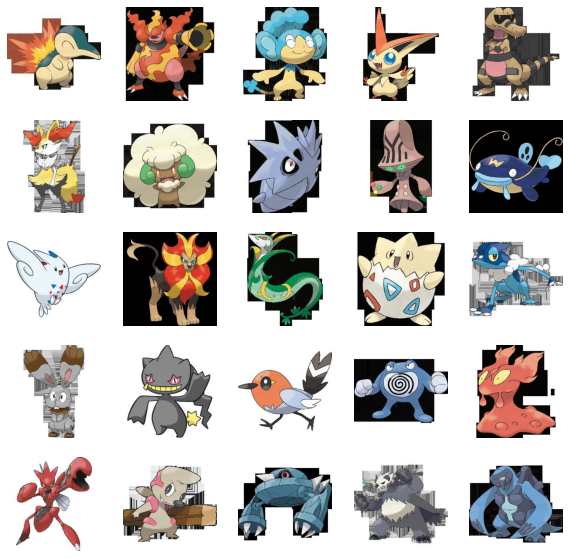

In [0]:
show_batch(images) #list of images

In [0]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [0]:
def show_batch(image_batch):
  print(type(image_batch))
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

<class 'numpy.ndarray'>
(32, 256, 256, 3)
<class 'numpy.ndarray'>


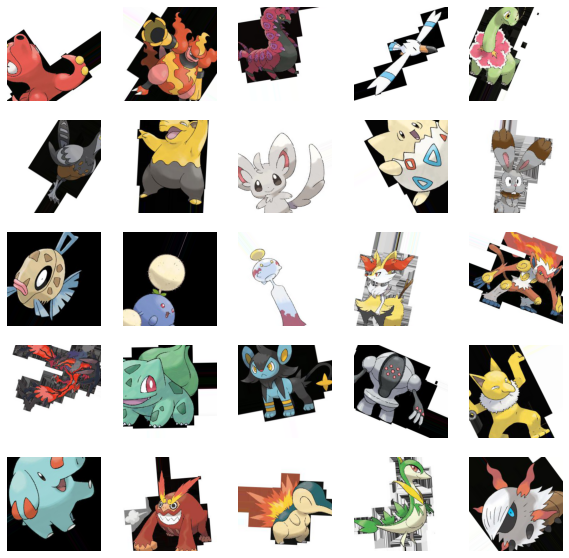

In [0]:
image_batch, label_batch = next(train_generator)
print(type(image_batch))
print(image_batch.shape)
show_batch(image_batch)

In [0]:
image_batch.shape

(32, 128, 128, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16384)             8208384   
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 16, 16, 128)       819328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 32, 32, 64)        204864    
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)       

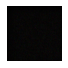

In [0]:
num_features = 500

generator = keras.models.Sequential([
                                    keras.layers.Dense(8*8*256, input_shape = [num_features]), #dense layer
                                    keras.layers.Reshape([8,8,256]), #reshaped to 7*7 of 128
                                    keras.layers.BatchNormalization(),
                                    keras.layers.Conv2DTranspose(128, (5,5), (2,2), padding='same', activation='selu'),
                                    keras.layers.BatchNormalization(),
                                    keras.layers.Conv2DTranspose(64, (5,5), (2,2), padding='same', activation='selu'),
                                    keras.layers.BatchNormalization(),
                                    keras.layers.Conv2DTranspose(32, (5,5), (2,2), padding='same', activation='selu'),
                                    keras.layers.BatchNormalization(),
                                    keras.layers.Conv2DTranspose(16, (5,5), (2,2), padding='same', activation='selu'),
                                    keras.layers.BatchNormalization(),
                                    keras.layers.Conv2DTranspose(3, (5,5), (2,2), padding='same', activation='tanh'),
])

generator.summary()

noise = tf.random.normal(shape = [1, num_features])

generated_image = generator(noise, training = False)
show(generated_image, 1)

discriminator = keras.models.Sequential([
                                         keras.layers.Conv2D(64, (5,5), (2,2), padding='same', input_shape = [256, 256, 3]),
                                         keras.layers.LeakyReLU(0.2),
                                         keras.layers.Dropout(0.3),
                                         keras.layers.Conv2D(128, (5,5), (2,2), padding='same'),
                                         keras.layers.LeakyReLU(0.2),
                                         keras.layers.Dropout(0.3),
                                         keras.layers.Conv2D(256, (5,5), (2,2), padding='same'),
                                         keras.layers.LeakyReLU(0.2),
                                         keras.layers.Dropout(0.3),
                                         keras.layers.Flatten(),
                                         keras.layers.Dense(1, activation = 'sigmoid'),
                                         
])

discriminator.summary()

discriminator_output = discriminator(generated_image, training=False)
print(discriminator_output)

discriminator.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop')
discriminator.trainable = False

gan = keras.models.Sequential([generator, discriminator])
gan.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop')

In [0]:
batch_size = 32

In [0]:
seed = tf.random.normal(shape = [batch_size, num_features])

In [0]:
def train_dcgan(gan, dataset, batch_size, num_features, epochs = 5):
    generator, discriminator = gan.layers
    for epoch in tqdm(range(epochs)):
        print("Epoch : {}/{}".format(epoch+1, epochs))
        #for i in range(0,batch_size):
        X_batch, label_batch = next(train_generator)
        noise = tf.random.normal(shape = [batch_size, num_features])
        generated_images = generator(noise)
        #type(generated_images)
        print('x_batch shape: ', X_batch.shape)
        X_fake_and_real = tf.concat([generated_images, X_batch], axis = 0)
        #y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * X_batch.shape[0])
        discriminator.trainable = True
        print('images shape: ', X_fake_and_real.shape)
        print(y1.shape)
        discriminator.train_on_batch(X_fake_and_real, y1)
        y2 = tf.constant([[1.]] * batch_size)
        discriminator.trainable = False
        gan.train_on_batch(noise, y2)
        display.clear_output(wait = True)
        #generate_and_save_images(generator, epoch+1, seed)
    #generate_and_save_images(generator, epochs, seed)


In [0]:
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training = False)
    fig = plt.figure(figsize = (10,10))

    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(predictions[i, :, :, :] * 127.5 + 127.5)
        plt.axis('off')
    
    plt.savefig('image_at_each_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [0]:
def train_dcgan2(gan, dataset, batch_size, num_features, epochs = 5):
    generator, discriminator = gan.layers
    for epoch in tqdm(range(epochs)):
        print("Epoch : {}/{}".format(epoch+1, epochs))
        for i in range(0,100):
            X_batch = grab_batch(images, batch_size)
            noise = tf.random.normal(shape = [batch_size, num_features])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis = 0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        display.clear_output(wait = True)
        generate_and_save_images(generator, epoch+1, seed)
    generate_and_save_images(generator, epochs, seed)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

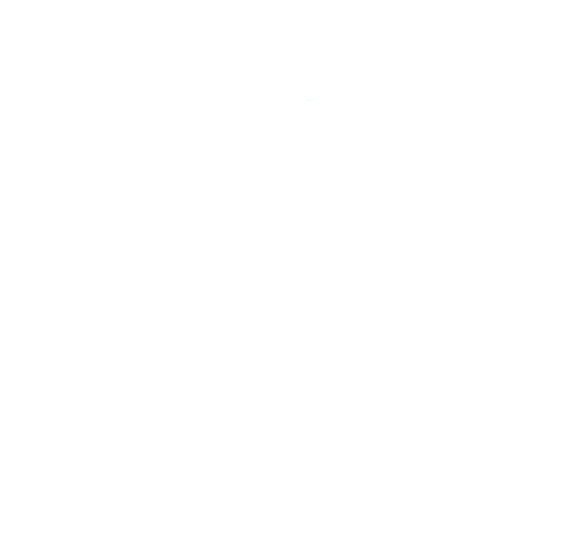


100%|██████████| 10/10 [10:30<00:00, 63.05s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1]

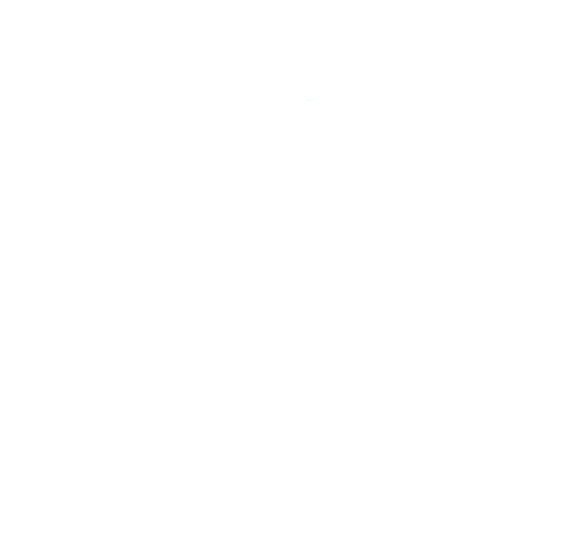

In [0]:
train_dcgan2(gan, train_generator, batch_size, num_features, epochs=10)

In [0]:
x_train_dcgan = next(train_generator)[0].reshape(-1,128,128,3) * 2. - 1.
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(x_train_dcgan).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

In [0]:
train_dcgan(gan, train_generator, batch_size, num_features, epochs=10)

100%|██████████| 10/10 [00:01<00:00,  5.67it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<class 'tensorflow.python.framework.ops.EagerTensor'> (32, 256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

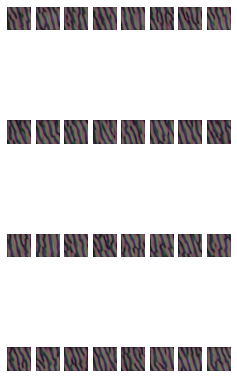

In [0]:
noise = tf.random.normal(shape = [batch_size, num_features])
generated_image = generator(noise)
show(generated_image, 4)

In [0]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  #label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img

In [0]:
dataset = tf.data.Dataset.from_tensor_slices(train_generator).shuffle(1000)

ValueError: ignored

In [0]:
def process_data():
    curr_dir = os.getcwd()
    pokemon_dir = os.path.join(curr_dir, 'resized_RGB')

    #storing all paths into a list
    imgs = []
    for i in os.listdir(pokemon_dir):
        imgs.append(os.path.join(pokemon_dir,i))

    print("Printing top 10 rows: ")
    print(imgs[:10])

    all_images = tf.convert_to_tensor(imgs, dtype = tf.string)

    images_queue = tf.data.Dataset.from_tensor_slices([all_images])

    print(images_queue)
    
    #content = tf.io.read_file(images_queue[0])
    content = images_queue

    image = tf.image.decode_jpeg(content, channels = 3)

    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta = 0.1)
    image = tf.image.random_contrast(image, lower = 0.9, upper = 1.1)

    size = [128, 128]
    image = tf.image.resize_images(image, size)
    image.set_shape([128,128,3])

    image = tf.cast(image, tf.float32)
    image = image / 255.0

    images_batch = tf.train.shuffle_batch(
                                    [image], batch_size = BATCH_SIZE,
                                    num_threads = 4, capacity = 200 + 3* BATCH_SIZE,
                                    min_after_dequeue = 200)
    num_images = len(images)

    return images_batch, num_images


images_batch, num_images = process_data()



Printing top 10 rows: 
['/content/PokemonGAN/resized_RGB/202.jpg', '/content/PokemonGAN/resized_RGB/12.jpg', '/content/PokemonGAN/resized_RGB/105.jpg', '/content/PokemonGAN/resized_RGB/232.jpg', '/content/PokemonGAN/resized_RGB/0.jpg', '/content/PokemonGAN/resized_RGB/243.jpg', '/content/PokemonGAN/resized_RGB/194.jpg', '/content/PokemonGAN/resized_RGB/229.jpg', '/content/PokemonGAN/resized_RGB/197.jpg', '/content/PokemonGAN/resized_RGB/227.jpg']
<TensorSliceDataset shapes: (100,), types: tf.string>


TypeError: ignored

In [0]:
imgs = []
pokemon_dir = os.path.join(os.getcwd(), 'resized_RGB')
for i in os.listdir(pokemon_dir):
    imgs.append(os.path.join(pokemon_dir,i))

print("Printing top 10 rows: ")
print(imgs[:10])

Printing top 10 rows: 
['/content/PokemonGAN/resized_RGB/202.jpg', '/content/PokemonGAN/resized_RGB/12.jpg', '/content/PokemonGAN/resized_RGB/105.jpg', '/content/PokemonGAN/resized_RGB/232.jpg', '/content/PokemonGAN/resized_RGB/0.jpg', '/content/PokemonGAN/resized_RGB/243.jpg', '/content/PokemonGAN/resized_RGB/194.jpg', '/content/PokemonGAN/resized_RGB/229.jpg', '/content/PokemonGAN/resized_RGB/197.jpg', '/content/PokemonGAN/resized_RGB/227.jpg']


In [0]:
import pathlib
data_dir = pathlib.Path(pokemon_dir)
image_count = len(list(data_dir.glob('*.jpg')))

In [0]:
print(image_count)

100


In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [0]:
BATCH_SIZE = 32
IMG_HEIGHT = 128
IMG_WIDTH = 128
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

/root


In [0]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list([]))

Found 0 images belonging to 0 classes.


In [0]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*'))

In [0]:
list_ds

<ShuffleDataset shapes: (), types: tf.string>

In [0]:
for f in list_ds.take(5):
  print(f.numpy())

b'/content/PokemonGAN/resized_RGB/123.jpg'
b'/content/PokemonGAN/resized_RGB/109.jpg'
b'/content/PokemonGAN/resized_RGB/158.jpg'
b'/content/PokemonGAN/resized_RGB/218.jpg'
b'/content/PokemonGAN/resized_RGB/170.jpg'


In [0]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [0]:
data = tfds.load(
    name, split=None, data_dir=None, batch_size=None, shuffle_files=False,
    download=True, as_supervised=False, decoders=None, read_config=None,
    with_info=False, builder_kwargs=None, download_and_prepare_kwargs=None,
    as_dataset_kwargs=None, try_gcs=False
)

In [0]:
data_dir = 'resized_RGB'
image_count = len(list(data_dir.glob('*.jpg')))
image_count